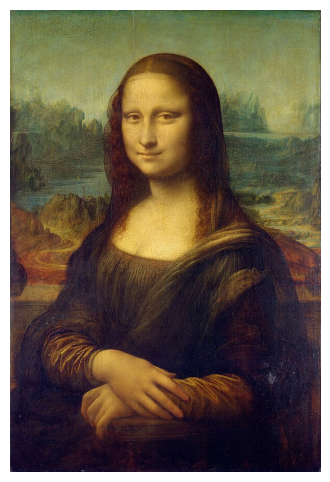

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from random import randint
%matplotlib inline

# Load and display the image
image_path = "Mona_Lisa.jpg"
mona_lisa_image = Image.open("Mona_Lisa.jpg")
mona_lisa_array = np.array(mona_lisa_image)

plt.figure(figsize=(6, 6))  # Adjust the size of the displayed image
plt.imshow(mona_lisa_array)
plt.axis('off')  # Remove axes for a cleaner look
plt.show()


2b and 2c) Preprocessing input and output


The dataset requires no input preprocessing for these reasons:

It lacks missing values, outliers, or categorical variables.
Random Forests handle diverse feature scales and types well.
Feature scaling, such as mean subtraction, standardization, or unit normalization, is unnecessary for Random Forests, as their decision-making is unaffected by varying feature scales.

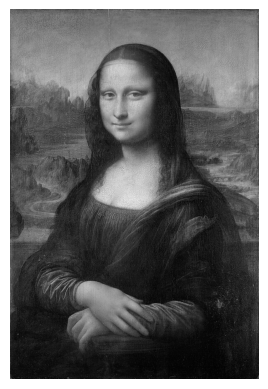

In [22]:
#Preprocessing Output: Turn to Grayscale
MonaLisa_Gray = mona_lisa_image.convert("L")
MonaLisa_Gray_Array = np.asarray(MonaLisa_Gray)
plt.imshow(MonaLisa_Gray_Array, cmap='gray')
plt.axis('off')
plt.show()

height = MonaLisa_Gray_Array.shape[0]
width = MonaLisa_Gray_Array.shape[1]

random_Points = [] #5000 random coordinates
weight = [] # Grayscale pixel brightness
for i in range(5000):
    ran_row = randint(0, height-1)
    ran_col = randint(0, width-1)
    random_Points.append([ran_row, ran_col])
    gray_brightness = MonaLisa_Gray.getpixel((ran_col,ran_row)) #getpixel(x,y);
    weight.append(gray_brightness)


In [23]:
all_pixel_coordinates=[]
for i in range(height):
    for j in range (width):
        all_pixel_coordinates.append((i,j))
print('total number of pixels:', len(all_pixel_coordinates))

total number of pixels: 543600


2d) Building the final image using random forest model prediction


For reconstructing the final image, we employed the RandomForestRegressor from machine learning's ensemble methods. This technique, a key component of the Random Forest algorithm, builds numerous decision trees during the training phase. For regression tasks, it generates predictions by averaging the outputs of these individual trees.

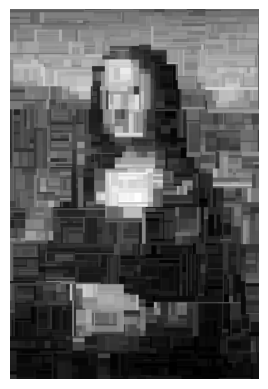

In [24]:
from sklearn.ensemble import RandomForestRegressor

def RF_experimentation (depth=None, num_trees = 1, title=None):
    RF = RandomForestRegressor(max_depth=depth, n_estimators=num_trees)
    RF.fit(random_Points, weight)
    prediction = RF.predict(all_pixel_coordinates) / 255
    plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
    if title != None:
        plt.title(title)
    plt.axis('off')
    plt.show()
    return RF

RF = RF_experimentation()

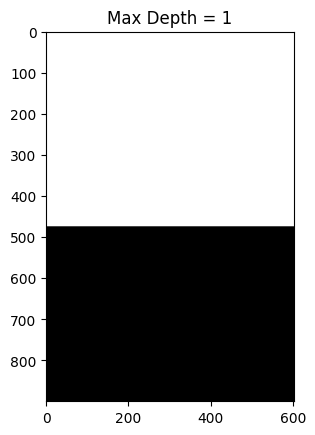

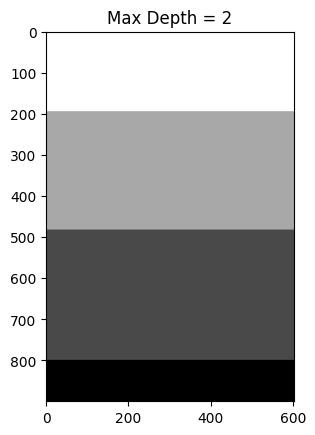

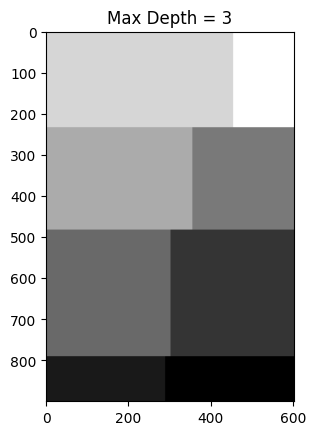

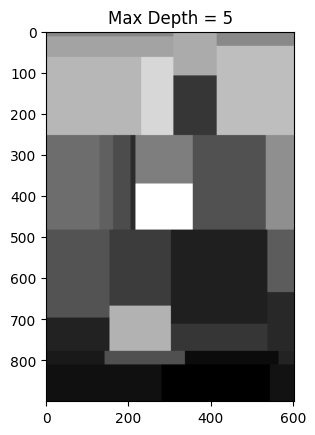

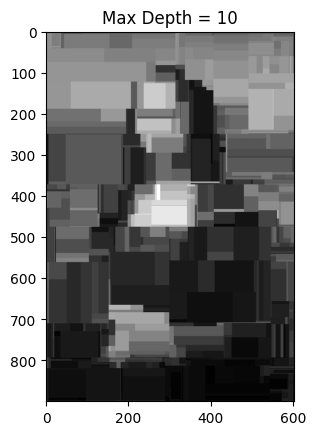

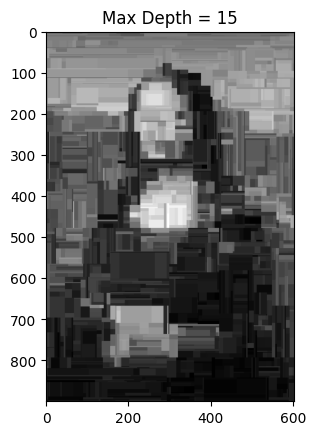

In [13]:
#variable depths
all_depths = [1,2,3,5,10,15]
for depth in all_depths:
    RF = RF_experimentation(depth, 1, "Max Depth = " + str(depth))


Varying Tree Depth Impact:

Low Depth (e.g., 1 or 2): Such shallow trees fail to grasp the data's complexities, leading to excessive generalization and potential underfitting. Consequently, this results in overly simplistic predictions and a blurred image representation, missing finer details.

High Depth (e.g., 10 or 15): Deeper trees are adept at detecting intricate data patterns but risk overfitting at excessive depths. This overfitting could cause the model to learn from the noise in training data, impairing its performance on new data. Selecting an optimal depth is therefore crucial. Visually, deeper trees yield clearer details and capture complex patterns more effectively.

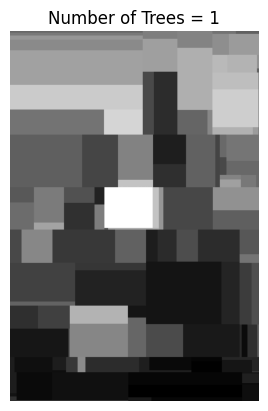

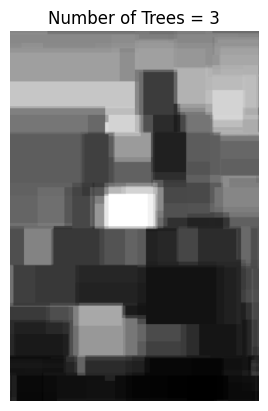

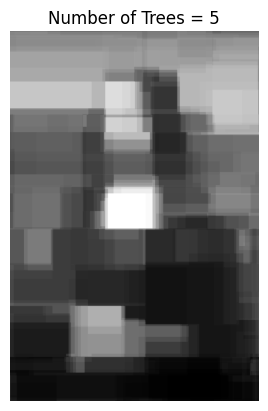

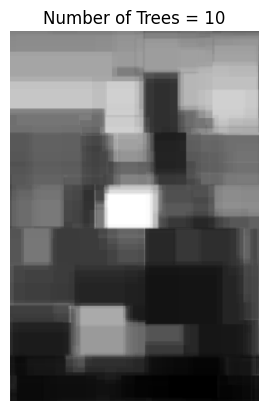

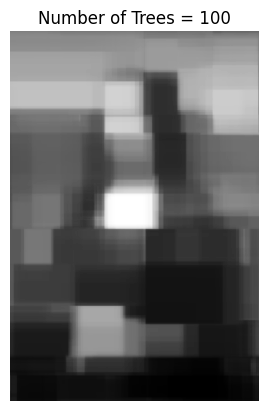

In [25]:
#variable number of trees
num_of_trees = [1,3,5,10,100]
for single_numOfTrees in num_of_trees:
    RF = RF_experimentation(7, single_numOfTrees, "Number of Trees = " + str(single_numOfTrees))


The influence of the tree count in a Random Forest Regressor extends to its predictive accuracy, stability, and computational demands.

Fewer Trees (e.g., 1 or 3): With limited trees, the model might not fully discern the data's nuances, leading to less precise and more noise-sensitive predictions. However, the computational load is lighter.
In terms of visualization, this results in a rougher and noisier image rendition.

More Trees (e.g., 10 or 100): A higher tree count typically elevates the model's accuracy. It mitigates variance and lends stability through the averaging of numerous estimators.
Visually, this translates into a more polished image with diminished noise.

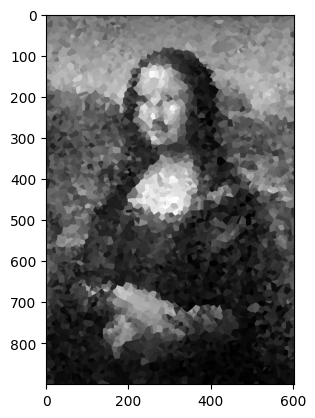

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(random_Points, weight)
prediction = model.predict(all_pixel_coordinates) / 255
plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
plt.show()

In [27]:
def pruning_experimentation (depth=None, n_estimators=10, min_samples_split = 3, min_samples_leaf = 1, title=None):
    RF = RandomForestRegressor(max_depth=depth, n_estimators=n_estimators,
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf)

    RF.fit(random_Points, weight)
    prediction = RF.predict(all_pixel_coordinates) / 255
    plt.imshow(np.array(prediction).reshape(height, width), cmap="gray")
    if title != None:
        plt.title(title)
    plt.show()
    return RF

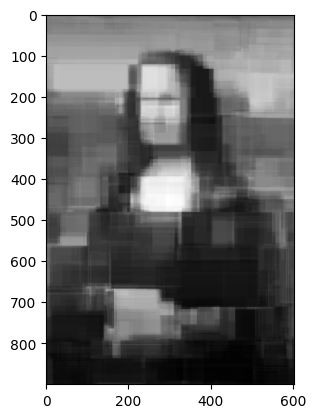

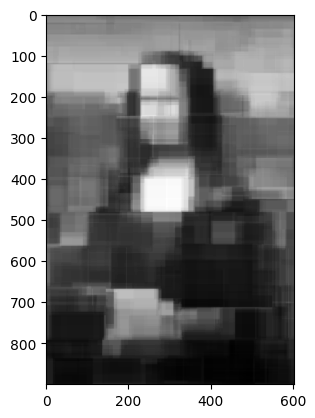

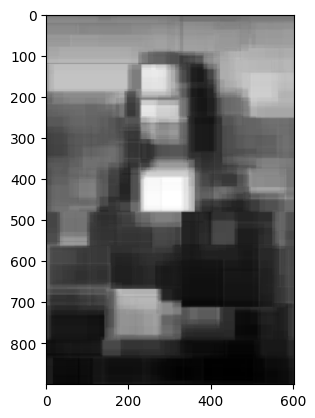

In [28]:
def disp_pruning_results(pars):
    i = 1
    for min_samples_split in pars['min_samples_split']:
        for min_samples_leaf in pars['min_samples_leaf']:
            title = "min_samples_split=" + str(min_samples_split) + " min_samples_leaf=" + str(min_samples_leaf)
            img_rf = pruning_experimentation(depth=10,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf)
            i += 1

params = {'min_samples_split' : [3, 10, 20],
          'min_samples_leaf' : [1]}
disp_pruning_results(params)

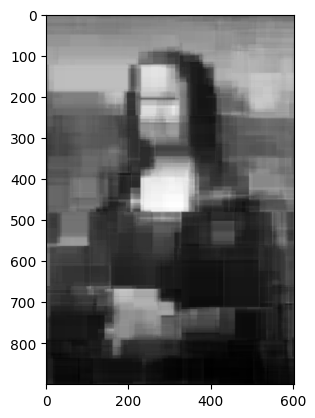

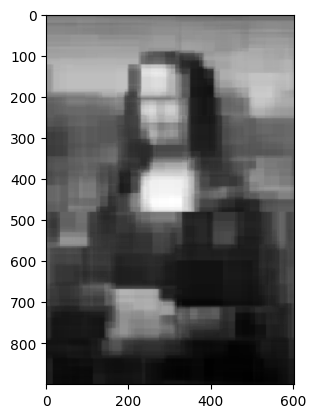

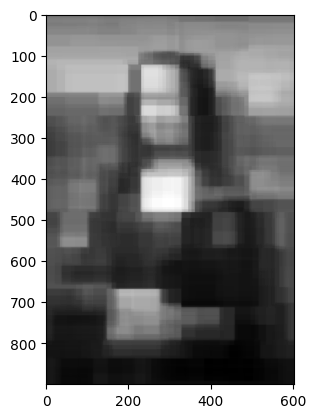

In [29]:
params = {'min_samples_split' : [3],
          'min_samples_leaf' : [1, 5, 10]}
disp_pruning_results(params)


2f) Analysis Overview:

In a Random Forest's decision tree, each split is governed by a feature and a corresponding threshold. The algorithm identifies the most effective feature for dividing the data at every node, based on specific criteria, and then sets a threshold for that feature to partition the data.

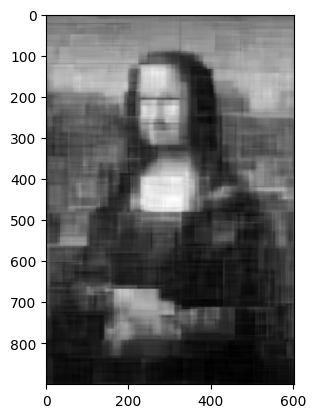

Feature index at root node: 0
Threshold value at root node: 481.5


In [30]:
RF = pruning_experimentation(20, 50, 3, 1)

first_tree = RF.estimators_[0]

# Extracting the feature and threshold for the split at the root node
feature_index = first_tree.tree_.feature[0]
threshold_value = first_tree.tree_.threshold[0]

# Printing the feature index and threshold value at the root node
print(f"Feature index at root node: {feature_index}")
print(f"Threshold value at root node: {threshold_value}")

The split point at the root node involve the feature X and a threshold value T. For a simple binary split:

The decision rule: if X <= 486.5, go left; else, go right. The specific feature X and threshold value T are determined during the training process based on the chosen criterion for splitting the data at each node.

ii)

The image created by a decision tree or Random Forest Regressor typically resembles a color mosaic, a direct result of its decision-making mechanics.

Shape: The color segments usually take square or rectangular forms. Each decision tree or Random Forest split yields a binary segmentation along a feature axis, creating square or rectangular sections in the image that represent decision areas as per the model's training.

Arrangement: These color blocks form a grid-like pattern over the image. Each region, having a uniform predicted value (for regression tasks), shows the majority rule applied within that area by the tree or forest. This layout mirrors the grid-structured decision boundaries set by the trees based on their splits along the feature axes.